In [ ]:
# In this data Notebook, I will use lasso regularization to select the best feature
# for predicting adoption speed for pets

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# import train.csv
url_train = "https://raw.githubusercontent.com/naufaldi-fir/adoption-prediction-project/main/Data%20Set/train.csv"
train = pd.read_csv(url_train)
print(train.head())

   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a

In [30]:
# all features which type is ordinal 
ordinal = ["Age","MaturitySize","FurLength"]

In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# define predictor X and target variable y
X = train[ordinal]
y = train["AdoptionSpeed"]

#Scale all features for predictor
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X) # X_scaled is numpy array
X_scaled_df=pd.DataFrame(X_scaled)

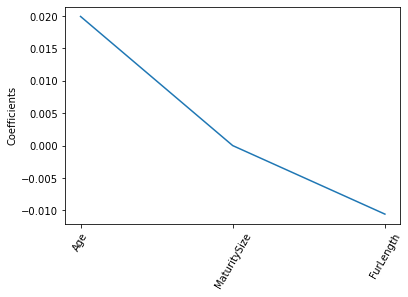

In [37]:
#building regression model with L1 regularization
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X_scaled_df,y).coef_

plt.plot(range(len(ordinal)), lasso_coef)
plt.xticks(range(len(ordinal)),ordinal, rotation = 60)
plt.ylabel("Coefficients")
plt.show()

In [ ]:
# Conclusion:
# Age is a feature with meaningful impact to predict the adoption speed because its coefficient
# reach 0.02, Fur Length has also an Impact, which is smaller and 